In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

import cartopy.crs as ccrs
import cartopy.feature as cfeat
import cartopy.io.img_tiles as cimgt

In [2]:
df = pd.read_pickle('datasets/cabspotting.pkl')

In [3]:
df.shape

(11219955, 3)

In [4]:
df.head()

latitude  longitude  occupied
taxi   time                                              
abboip 2008-05-17 14:12:10  37.75153 -122.39447         0
       2008-05-17 14:13:34  37.75149 -122.39447         0
       2008-05-17 14:14:34  37.75149 -122.39447         0
       2008-05-17 14:15:35  37.75149 -122.39446         0
       2008-05-17 14:41:43  37.75144 -122.39449         0

In [5]:
df['latitude'].describe()

count    1.121996e+07
mean     3.776360e+01
std      5.386020e-02
min      3.286970e+01
25%      3.775513e+01
50%      3.778107e+01
75%      3.779045e+01
max      5.030546e+01
Name: latitude, dtype: float64

In [6]:
df['longitude'].describe()

count    1.121996e+07
mean    -1.224124e+02
std      3.578213e-02
min     -1.270814e+02
25%     -1.224253e+02
50%     -1.224111e+02
75%     -1.224003e+02
max     -1.155622e+02
Name: longitude, dtype: float64

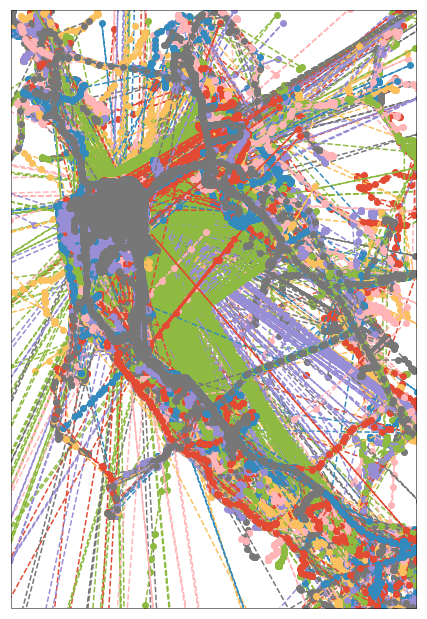

In [8]:
plt.figure(figsize = (11, 11))
    
img = cimgt.GoogleTiles()

ax = plt.axes(projection = img.crs)
ax.set_extent((-122.578295, -122.0039133333, 37.32683, 37.99691))
    
#ax.add_image(img, 12, interpolation = 'bicubic')

for taxi in df.index.levels[0]:
    lats = df.loc[taxi]['latitude']
    lons = df.loc[taxi]['longitude']
    plt.plot(lons, lats, 'o--', transform=ccrs.PlateCarree())